# Análise Exploratória de Dados (EDA) - Distribuição Realista

Este notebook valida a geração de dados geoespaciais realistas para o problema de roteirização em São Paulo.

In [1]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Adiciona a raiz do projeto ao path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.data_gen import RealWorldVRPCreator

## 1. Geração de Dados
Geramos 200 clientes distribuídos em clusters (Centro, Itaim, Guarulhos, Osasco).

In [2]:
creator = RealWorldVRPCreator(num_customers=200)
data_model = creator.create_data_model(num_vehicles=20)
locations = data_model['locations']

# Converter para DataFrame
df_locs = pd.DataFrame([
    {"lat": loc.lat, "lon": loc.lon, "type": "Depósito" if loc.is_depot else "Cliente", "demand": loc.demand}
    for loc in locations
])

print(df_locs.head())

         lat        lon      type  demand
0 -23.550500 -46.633300  Depósito       0
1 -23.540566 -46.626818   Cliente       9
2 -23.553265 -46.641002   Cliente       5
3 -23.537546 -46.646838   Cliente       1
4 -23.520039 -46.621066   Cliente       3


## 2. Visualização Espacial (Clusters)
Visualizamos a distribuição espacial para confirmar a formação dos clusters geográficos.

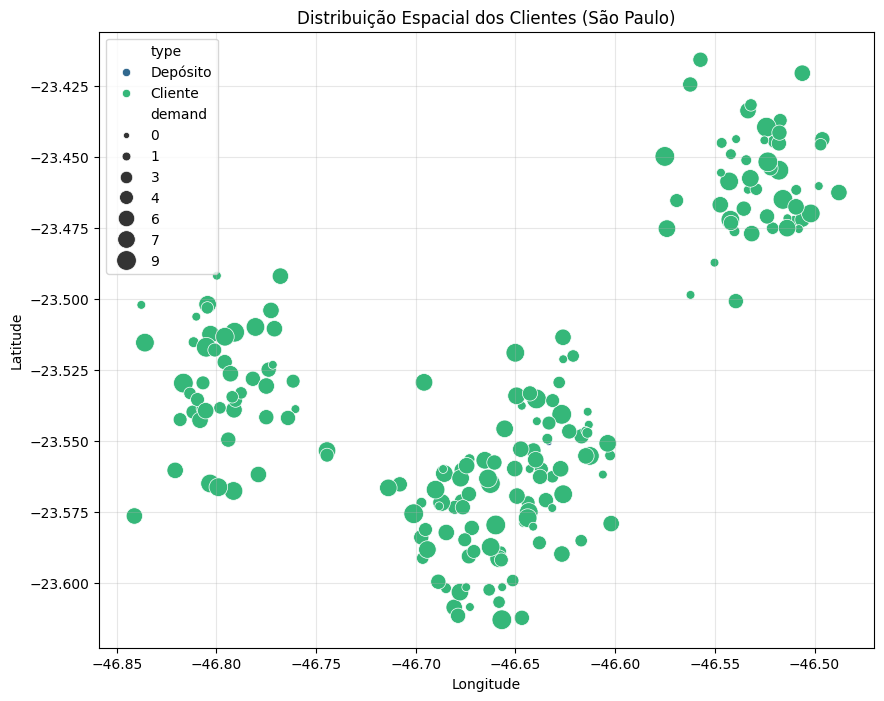

In [3]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_locs, x="lon", y="lat", hue="type", size="demand", sizes=(20, 200), palette="viridis")
plt.title("Distribuição Espacial dos Clientes (São Paulo)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, alpha=0.3)
plt.show()

## 3. Análise de Janelas de Tempo
Verificamos a distribuição das janelas de tempo geradas para garantir que são realistas.

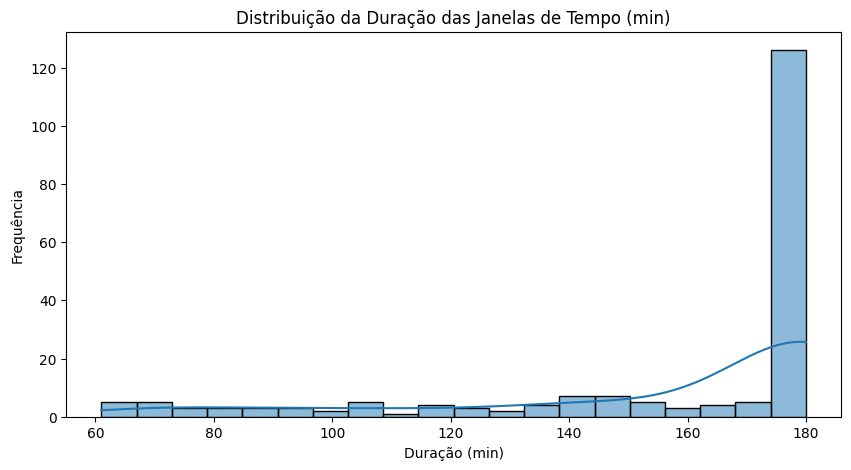

In [4]:
time_windows = data_model['time_windows']
durations = [(end - start) for start, end in time_windows if start != 0] # Ignora depósito

plt.figure(figsize=(10, 5))
sns.histplot(durations, bins=20, kde=True)
plt.title("Distribuição da Duração das Janelas de Tempo (min)")
plt.xlabel("Duração (min)")
plt.ylabel("Frequência")
plt.show()